<a href="https://colab.research.google.com/github/lilyadamek8/graph1/blob/master/Assignment%20AI%20Week%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

The dataset that I have chosen is focused on a Zoo and all of the animals inside of it. It contains the answers to a list of 18 questions for each animal of 101 animals inside the zoo, of which there is animal name, 15 Boolean attributes and also 2 numeric integer attributes (both have a range in which they can be answered).  The dataset therefore displays and records all necessary attributes about each animal in a zoo and allows the user to try and identify an animal based on its attributes. 
NB: For the purpose of this dataset, 0 represents false for the Boolean attributes and 1 represents true.

The problem that I want to train a machine learning algorithm on is **“To determine what type an animal is of in the zoo based on its given attributes.”**

I want to determine this to enable the user to easily classify an animal and if it is of a certain type (Type 5). To train the machine learning algorithm on this problem statement, I will first remove the ‘animal name’ and ‘animal type’ attribute and will solely be using the other 16 attributes for each animal in the zoo. 

---


This problem is* supervised machine learning* as the problem statement asks the algorithm to predict a discrete value by identifying the data inputted as a member of a particular animal type. In the training dataset of animal types, each animal would be pre-labelled as a particular animal type, between 1 and 7, and the algorithm is subsequently evaluated on how accurately it can successfully classify new animals based on their attributes given. Additionally, this is a classification problem as the animals are restricted to the 7 provided animal types given in the dataset, and are already pre-defined and therefore there is no other option or animal type available for them to be defined as. 


Fundamentally, I am trying to solve this problem as it will save time for the Zoo staff as they won’t have to continuously spend unnecessary time trying to classify each animal in the zoo and any new animals that enter the zoo, but I am primarily doing this to prevent animals from being situated in the incorrect compound as this could lead to incompatible animals being placed together and not getting along. Therefore, once I am able to solve this problem, by predicting the type of each animal, I will hopefully be able to allow the zookeepers to spend more time with the animals and not in the office doing admin, subsequently providing the animals with more in depth care and interaction to allow them to be as happy as they can be and as well looked after as possible. 


In [0]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


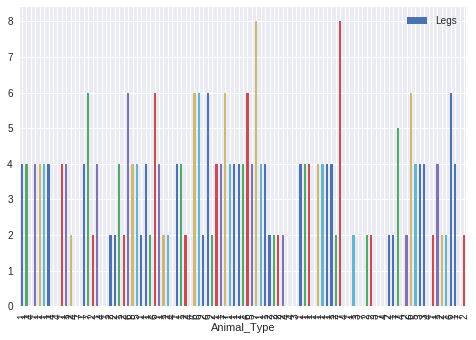

In [0]:
csv_file_uri = "https://raw.githubusercontent.com/lilyadamek8/zoodata/master/Zoo%20Raw%20Data.txt" ## the location of the data from GitHub

## defining the columns needed in the imported dataset 
column_names = [
    "Animal_Name", "Hair", "Feathers", "Eggs", "Milk", "Airborne", "Aquatic",
    "Predator", "Toothed", "Backbone", "Breathes", "Venomous", "Fins",
    "Legs", "Tail", "Domestic", "Catsize", "Animal_Type"
]  

data = pd.read_csv(csv_file_uri, names=column_names, index_col=False)

data.plot.bar(x='Animal_Type', y = 'Legs')
plt.rcParams['figure.figsize'] = (10,6)


I used the above code to create a basic bar graph surrounding the animal type against the number of legs an animal type has; I did this before the data was encoded/changed because it was more diverse and I also wanted to ensure that the data was correct and was running as expected. 


In [0]:
data.drop(["Animal_Name"], axis=1, inplace=True) # removing the column containing the animal names as it is not required


**Encoding Data**

Before I could use a model, I had to encode my dataset by altering the data in the column ‘Animal_Type’.

I encoded this data as it originally is a number between 1 and 7 for each animal, however I need to gather information on all of the animals which are of animal type 5, so therefore I altered the data so that if ‘Animal_Type’ = 5 then it was changed to a 1 and every other animal was labelled 0; this enables me to then calculate the accuracy of my machine learning algorithm. I didn’t encode any other column of data as they are all Boolean and do not require encoding as they are already in the necessary format. Before I use any model, I will need to process the raw data and also encode the data as previously discussed, so that it is ready to be used within the model.

In [0]:
def convert_animaltype_integer (num): # converting the animals in type 3 to a boolean value
  if num == 3:
    return 1
  else:
    return 0 

  
data["Animal_Type"] = data.Animal_Type.apply(convert_animaltype_integer) ## changes the value in the column 'animal type' to a 1 for al type 3 animals


data.head(30) ## prints out however many rows (animals) that you want to see
# change this as appropriate


,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Animal_Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,0
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,0


In [0]:
# displaying the size of the dataset
data.shape

(101, 17)

In [0]:
feature_columns = data.columns.tolist()
feature_columns.remove("Animal_Type")

X = data[feature_columns].values # gets the values/data from all of the columns
y = data["Animal_Type"].values # gets the animal type values (either 1 or 0)

print(X.shape)
print(y.shape)

(101, 16)
(101,)


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 2, 14)):
  
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=500)
    clf_l1_LR.fit(X, y)
 

    coef_l1_LR = clf_l1_LR.coef_.ravel()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N.B. I took this code and manipulated from the following website:

http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py

In [0]:
# #applying cross-validation to the dataset
from sklearn import model_selection

seed = 3

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.008, random_state=seed) ## alter the test size for a change in prediction accuracy

# training the model using the training sets
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

# using the training data to predict the result
accuracy_train = clf.score(X_train, y_train)
print("- The model's training accuracy is {}".format(accuracy_train*100))


- The model's training accuracy is 91.07744107744108


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Having experimented with altering the 'test size' used, I found that the larger the test size that was used, the more accurate the models training would be. For example, when I use test size of 0.2 the model's training accuracy is only 95, however when I increase the test size used to 0.5, the training of the model becomes 98% accurate from the training.

**Linear Regression Model**

In [0]:
from sklearn import linear_model

# Makes predictions using the testing set
pred = clf.predict(X[-1,:].reshape(1,64))

print(data.iloc[data.index[0]])
if pred == 0:
  print("\nPredicts its not a Type 3 animal") ## to easily display to the user what the system predicts, rather than it just showing a 1 or a 0 value 
else :
  print("Predicts it is a Type 3 animal")

Hair           1
Feathers       0
Eggs           0
Milk           1
Airborne       0
Aquatic        0
Predator       1
Toothed        1
Backbone       1
Breathes       1
Venomous       0
Fins           0
Legs           4
Tail           0
Domestic       0
Catsize        1
Animal_Type    0
Name: 0, dtype: int64
Predicts it is a Type 3 animal


In [0]:
# Creating the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=8)

clf.fit(X, y)

pred2 = clf.predict(X[-1,:].reshape(1,64))
print(data.iloc[data.index[0]])
if pred == 0:
  print("\nPredict its not a Type 3 animal")
else :
  print("Predict it is a Type 3 animal")
 

Hair           1
Feathers       0
Eggs           0
Milk           1
Airborne       0
Aquatic        0
Predator       1
Toothed        1
Backbone       1
Breathes       1
Venomous       0
Fins           0
Legs           4
Tail           0
Domestic       0
Catsize        1
Animal_Type    0
Name: 0, dtype: int64
Predict it is a Type 3 animal


This breaks down the thought process of the machine to the user, which allows them to see which columns were most important to the machine when predicting the type that the animal would be.

The columns that are chosen are relevant to the animal type, for example animal type 5 contains mainly aquatic animals and therefore the main columns that will be taken into consideration would be aquatic, feathers, legs, tail, etc. as they are the most relevant to the examples of animals already considered to be of that type (5). This enables the machine learning to be the most accurate as possible with its predictions and focus on the key data.

I chose to do animal type 3 as it has the most feature columns which makes it the most diverse for the users and the most accurate as it takes in more information and data than the other types of animals. 

In [0]:
## printing out the importance of the feature columns one by one

for ix, c in enumerate(feature_columns):
    if clf.feature_importances_[ix] > 0:
        print("Column {} is {}".format(c, clf.feature_importances_[ix]*100.0))

Column Milk is 0.10886701070432009
Column Aquatic is 0.9195986737638934
Column Predator is 11.224771452446381
Column Breathes is 1.0265711677019962
Column Fins is 0.9004316129235612
Column Legs is 1.0453130151884023
Column Tail is 0.5206696922502579


In [0]:
# applying the 2 models/algorithms to the dataset 
from sklearn.linear_model import LogisticRegression

scoring = 'accuracy'

models = []
models.append(('LogisticReg', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))

# evaluating each model individually to get the accuracy rates
results = []
names = []
for name, model in models:
  
  kfold = model_selection.KFold(n_splits=10, random_state=0.3) 
  cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticReg: 0.879745 (0.042027)
DecisionTree: 0.863669 (0.031338)


# Parameter Tuning Results

See below for the results from when I altered the hyper-parameters that the algorithm was using (in the form of 'tolerance'), and the data that it resulted in. This includes the data for both the average accuracy rate and also the standard deviation rate and how they differed when the parameters were tuned.

Run No.  |  Hyper-Parameter  |  Mean Result  ||	 Standard Deviation
                  

                                                      
1                   0.00001	                       0.865	                    0.027

2                 	0.001                           	0.866	                    0.031

3	                  0.008	                            0.873                    	0.028

4	                  0.009	                            0.870	                    0.028

5	                  0.01	                             0.870	                    0.034

6	                  0.5	                                0.862	                     0.036

7	                  5 (i)	                              0.869	                     0.026

8	                  5 (ii)	                            0.865	                     0.024

9	                  5 (iii)	                            0.870	                     0.033

10	               5(iv)	                            0.877	                     0.029




# Comparing Models

I have chosen to use 2 models to assist with my problem statement, which are a ‘Decision Tree’ and ‘Logistic Regression’. To help me to decide which model would be the best and most accurate for my zoo dataset, I used box and whisker plot graphs to visually compare the 2 models. This compared the range and the mean accuracy of both models which made it easy for me to be able to see how accurate they were on average and also generally, as the results will differ when the algorithm is run. 

There is a population of accuracy measures for each algorithm as each algorithm was evaluated 10 times (10 fold cross validation). 

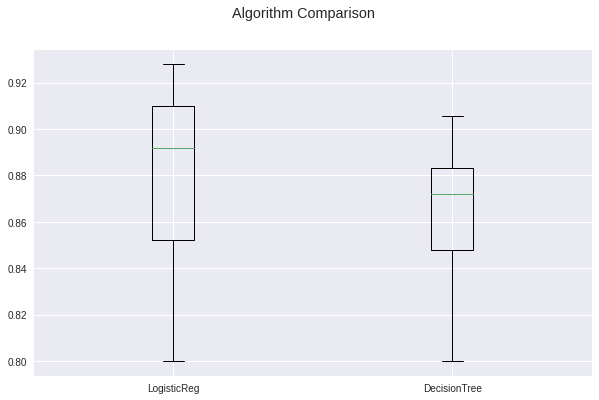

In [0]:
# Comparing the 2 models 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Results from running the models**

The above graph displays visual evidence from running the models, based on their performance and accuracy. Take this as a comparison, as you can see the most accurate prediction and least accurate which therefore allows the user to see the range in which the predictions can be in. I personally would choose the model with the lowest range (so the decision tree in this instance) as it is more consistent and has lower variance which could lead to anomalies or even just incorrect results. 


I ran both of the models 12 times, including cross-validation. I tried different hyper parameters in order to reach maximum accuracy and to improve my machine learning algorithm. Please find the hyper parameters that I used and the corresponding results below for each model.


# **Clustering Algorithm**
**Mean Shift Clustering**

I added the ‘Mean Shift Clustering Algorithm’ to my machine learning experiment's pre-processing using the below code, in order to remove duplicates and also to find the most common predictions in the form of clusters by collating the nearest possible answers/results. 

+ I used this clustering algorithm rather than the other 3 due to its simplicity. Due to the end result being controlled by one parameter (the kernel bandwith value), whereas for example the K-means clustering algorithm requires the number of clusters as an input and I wouldn't have this data to be able to input it initially. 
+ I also chose to use this algorithm as it uses the density of the points to generate the number of clusters which provides a more rounded and accurate result to the algorithm.


In [0]:
from sklearn import cluster
import numpy as np

ms = cluster.MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=1)
ms.fit(data,y=None)
labels= ms.labels_

cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 3


This code uses the mean shift clustering algorithm to initially generate the number of the clusters formed by the dataset, allowing the user to be able to visualise the amount of clusters that have been created and the general outline of the clustering diagram created from the models.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


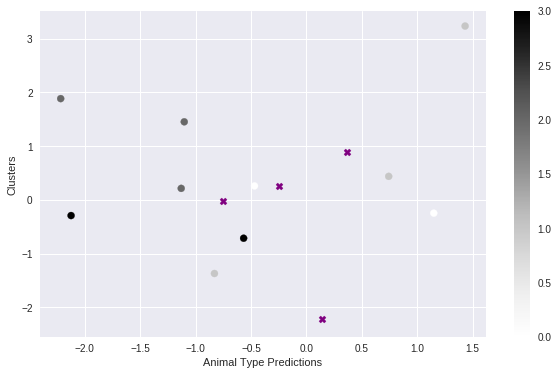

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10)
y = np.random.randn(10)
Cluster = np.array([0, 1, 1, 1, 3, 2, 2, 3, 0, 2])    # Labels of cluster 0 to 3
centers = np.random.randn(4, 2) 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='purple',marker='X') ## defines what colour and marking should be used when showing the main clusters on the diagram

# defines the axis titles
ax.set_xlabel('Animal Type Predictions')
ax.set_ylabel('Clusters') 

plt.colorbar(scatter)

fig.show()

As you can see from the above, I successfully created and implemented a mean shift clustering algorithm based on the previous code block which generates the number of clusters that the dataset will generate.

However, I didn't manage to incorporate my own zoo dataset into this algorithm and the plot graph above includes random data based on random clusters of data. But despite all of this, the plot graph was successfully implemented and with further knowledge on how to implement a clustering algorithm, this would become personalised to generating predictions on animal type very quickly. I would simply need to feed the clusters into my machine learning algorithm, using the models, and the clustering algorithm would then be incorporated successfully. 

The plot graph above clearly displays the clusters (using the purple 'X' notation), but it also shows each point (prediction) that has been taken into account for the algorithm to be able to form the initial clusters.  This information is useful as it allows the user to see where the clusters were formed on the graph i.e. allows them to visualise where the most common predictions were made and then were the subsequent clusters were formed and the justifications behind their formations. 




# Data Visualisation

I ran the models countless times, however I changed the hyper-parameters to attempt to increase the accuracy and I recorded the results each time in correspondence to the tolerance value in the algorithm. You can see on my [GitHub](https://github.com/lilyadamek8/GraphsData/blob/master/graph2.PNG) a visual representation of the data and how the mean accuracy changed when the hyper parameter was altered. This graph contains both the mean accuracy rate of the algorithm's predictions but also the standard deviation of each. As you can see, the standard deviation stayed nearly the same rate all throughout with slight deviations but the average accuracy rate was the main change in predictions data.


As you can see from the [graph](https://https://github.com/lilyadamek8/GraphsData/blob/master/mean%20graph.PNG), as the hyper-parameter increased (from 0.00001 to 0.008), the accuracy rate slowly increased therefore showing that the higher the tolerance the faster that the machine would learn and the more accurate that it would be with it's predictions; however, as you can also see, 0.008 appeared to be the most accurate value to use for tolerance as the accuracy on average decreased from there onwards. I then decided to use the same tolerance value and not change any hyper-parameter but instead to re-run the experiment with the same tolerance and see if the results varied and ultimately if my machine was learning anything from the experiment (I hoped so!). Luckily, I was proved to be correct as you can see when I ran the algorithm with 'Tolerance = 5', the average accuracy did increase (I am aware there was a decrease in 5 (ii) but this could be due to an anomaly or even just a bad prediction, I am just stating that thereon after the mean increased with the amount of runs). Therefore, the machine learning experiment is successful as it learns every time it is run and  is always gaining knowledge from the algorithm and dataset!

# Discussion

I chose to use the Logistic Regression and Decision Tree models as once I had loaded the data into my system, I ran around 5 individual models and gathered the accuracy of each of their predictions, and these 2 models were by far the most accurate which is why I chose to go with them for my experiment. In conclusion to this task, I would choose to use the ‘Decision Tree’ model to allow the machine learning algorithm to predict if the animal would be of a particular type, mainly because it has a lower range and still has a accuracy rate of 95% which shows that the results are more likely to be correct and closer to the actual result as the algorithm is more consistent than the ‘Logistic Regression’ model. 

Both models generate an accuracy rate of around 95% each time (ranging between 85%-100%, depending on the hyper-parameters used), which is very high but is expected as the animals can only be of types 1-7 and the given animals in each type are all very similar already and have very similar attributes, making it a lot easier to classify them and provide a prediction on what type an animal would be based on its given attributes. The algorithm is also made a lot simpler by the majority of the attributes being made up of Boolean values, meaning that there is only a true or false answer that is possible which therefore makes the predictions a lot simpler and the structure more straight forward for the algorithm to process and follow. Due to these factors, I do not think that it is an issue that the accuracy is so high, because the possible values of the attributes are limited and subsequently lead to the process being made a lot simpler than other datasets that could've been used with different algorithms. 

https://github.com/lilyadamek8/graph1/blob/master/111.png

As you can see from the whisker plot graph above (click to view the file), the ‘Decision Tree’ model is the more consistent of the 2, with fewer varying results and a lower range, making it the most reliable model to use as there is less chance of anomalies occurring and more chance of receiving an accurate prediction. However, the ‘Logistic Regression’ model is also extremely accurate with a relatively low range, however the lower extreme generated from the results is a lot lower than the decision tree model, and therefore the LR model appears to provide less consistent results. Overall, the robustness of the Decision Tree model is observably better than the Logistic Regression model however this could also mean that the machine is learning more from the LR model due to the varying results (it could be taking more data as an input and processing a lot more data which could be causing the varying results) and therefore this model would be the most accurate and representative of the dataset and would be the preferred model to use; this would require some further investigation to be able to actually decipher why the results were so varied in the LR model and what data each model prioritises when making a prediction on the animal type. Despite all of these factors, neither of the models have any anomalies from the data, which shows that both models are reliable and provide accurate and well processed results most of the time (if not all) and therefore both models could be used for making predictions for this experiment. 





# Recommendation


My advice would be that we actively use the Decision Tree model for this experiment as it provides a very reliable prediction nearly every time, the range is small, meaning that the results do not vary by a vast amount proving that the results are nearly ALWAYS 90% or more accurate, and there are no anomalies. I recommend that we use this model to predict if an animal is of a certain type as it runs extremely fast, saving zookeepers time that could be spent doing other work and will save the zoo animals from being placed in the incorrect pens with incompatible animal types, but most importantly because it has a very high accuracy rate and is reliable, consistent and robust which is everything that a machine learning algorithm should be.
